In [61]:
# import required libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import torch
import torch.nn as nn

from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder

In [62]:
# loading the dataset
path = '/kaggle/input/playground-series-s3e22/'
df_train = pd.read_csv(path + 'train.csv')
df_test = pd.read_csv(path + 'test.csv')

In [63]:
# overview of the dataset
pd.set_option('display.max_columns',50)
df_train.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [64]:
# melt id colums in the training and testing datasets [lesion_1, lesion_2, lesion_3] :

id_cols_train = df_train.columns.drop(['lesion_1', 'lesion_2', 'lesion_3'])
id_cols_test = df_test.columns.drop(['lesion_1', 'lesion_2', 'lesion_3'])

df_train = df_train.melt(id_vars = id_cols_train, value_vars = ['lesion_1', 'lesion_2','lesion_3'], var_name = 'lesion_type', value_name = 'lesion_value')
df_test = df_test.melt(id_vars = id_cols_test, value_vars = ['lesion_1', 'lesion_2','lesion_3'], var_name = 'lesion_type', value_name = 'lesion_value')

In [65]:
df_train.head(5)

,id,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,outcome,lesion_type,lesion_value
0,0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,no,died,lesion_1,2209
1,1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,no,euthanized,lesion_1,2208
2,2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,no,lived,lesion_1,5124
3,3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,yes,lived,lesion_1,2208
4,4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,yes,lived,lesion_1,0


In [66]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3705 entries, 0 to 3704
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3705 non-null   int64  
 1   surgery                3705 non-null   object 
 2   age                    3705 non-null   object 
 3   hospital_number        3705 non-null   int64  
 4   rectal_temp            3705 non-null   float64
 5   pulse                  3705 non-null   float64
 6   respiratory_rate       3705 non-null   float64
 7   temp_of_extremities    3588 non-null   object 
 8   peripheral_pulse       3525 non-null   object 
 9   mucous_membrane        3642 non-null   object 
 10  capillary_refill_time  3687 non-null   object 
 11  pain                   3573 non-null   object 
 12  peristalsis            3645 non-null   object 
 13  abdominal_distention   3636 non-null   object 
 14  nasogastric_tube       3465 non-null   object 
 15  naso

In [67]:
# checking for null values
df_train.isnull().sum()

id                         0
surgery                    0
age                        0
hospital_number            0
rectal_temp                0
pulse                      0
respiratory_rate           0
temp_of_extremities      117
peripheral_pulse         180
mucous_membrane           63
capillary_refill_time     18
pain                     132
peristalsis               60
abdominal_distention      69
nasogastric_tube         240
nasogastric_reflux        63
nasogastric_reflux_ph      0
rectal_exam_feces        570
abdomen                  639
packed_cell_volume         0
total_protein              0
abdomo_appearance        144
abdomo_protein             0
surgical_lesion            0
cp_data                    0
outcome                    0
lesion_type                0
lesion_value               0
dtype: int64

In [68]:
df_train.describe()

,id,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_value
count,3705.000000,3.705000e+03,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000,3705.000000
mean,617.000000,9.545004e+05,38.202186,79.574089,30.054251,4.382591,49.602429,21.388016,3.290931,1283.561943
std,356.561797,1.356037e+06,0.788455,29.100778,16.447624,1.936834,10.532955,26.669250,1.588766,3621.040335
min,0.000000,5.213990e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.500000,0.100000,0.000000
25%,308.000000,5.288000e+05,37.800000,52.000000,18.000000,2.000000,43.000000,6.600000,2.000000,0.000000
50%,617.000000,5.297770e+05,38.200000,76.000000,28.000000,4.500000,48.000000,7.500000,3.000000,0.000000
75%,926.000000,5.341450e+05,38.600000,100.000000,36.000000,6.000000,57.000000,9.100000,4.300000,2205.000000
max,1234.000000,5.305129e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000


In [69]:
# checking for duplicates in our data
df_train.duplicated().sum()

0

In [70]:
df_test.duplicated().sum()

0

In [71]:
# dropping useless columns
df_train = df_train.drop(columns = ['id','hospital_number'])
df_test = df_test.drop(columns = ['id','hospital_number'])

In [72]:
# seperating numerical columns
df_train_numerical = df_train.select_dtypes(include = [np.number])
df_test_numerical = df_test.select_dtypes(include = [np.number])
df_train_numerical.shape

(3705, 8)

In [73]:
# seperating categorical columns
df_train_cat = df_train.select_dtypes(exclude = [np.number])
df_test_cat = df_test.select_dtypes(exclude = [np.number])
df_train_cat.shape

(3705, 18)

# correlation

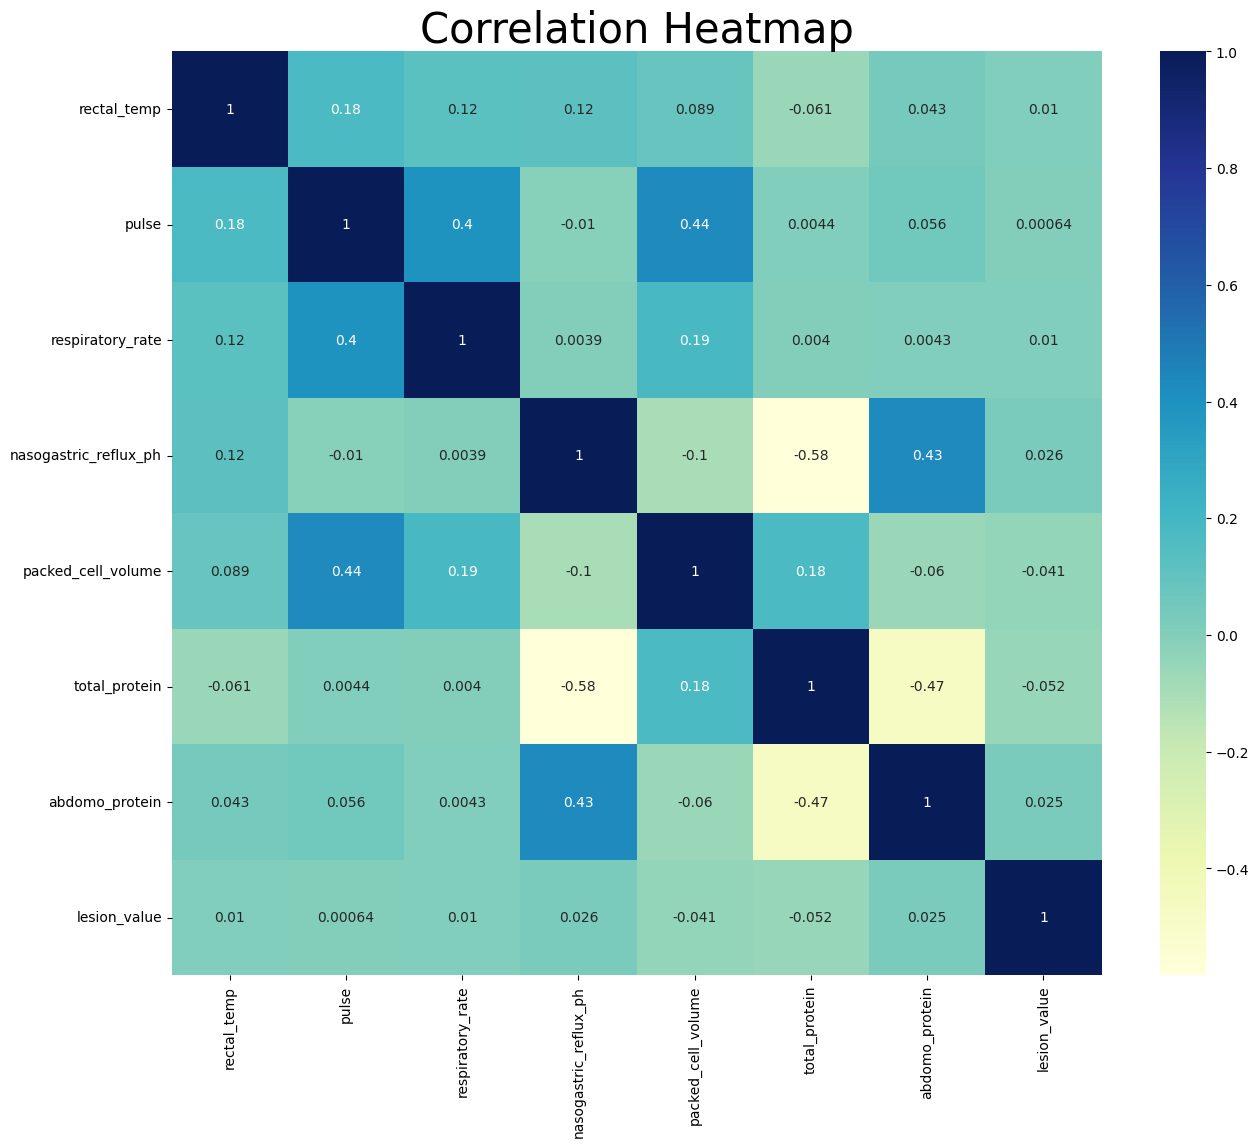

In [74]:
# correlation matrix :
plt.figure(figsize = [15,12]);
corr_matrx = df_train_numerical.corr()
sb.heatmap(corr_matrx, cmap="YlGnBu", annot=True);
plt.title('Correlation Heatmap', size = 30);

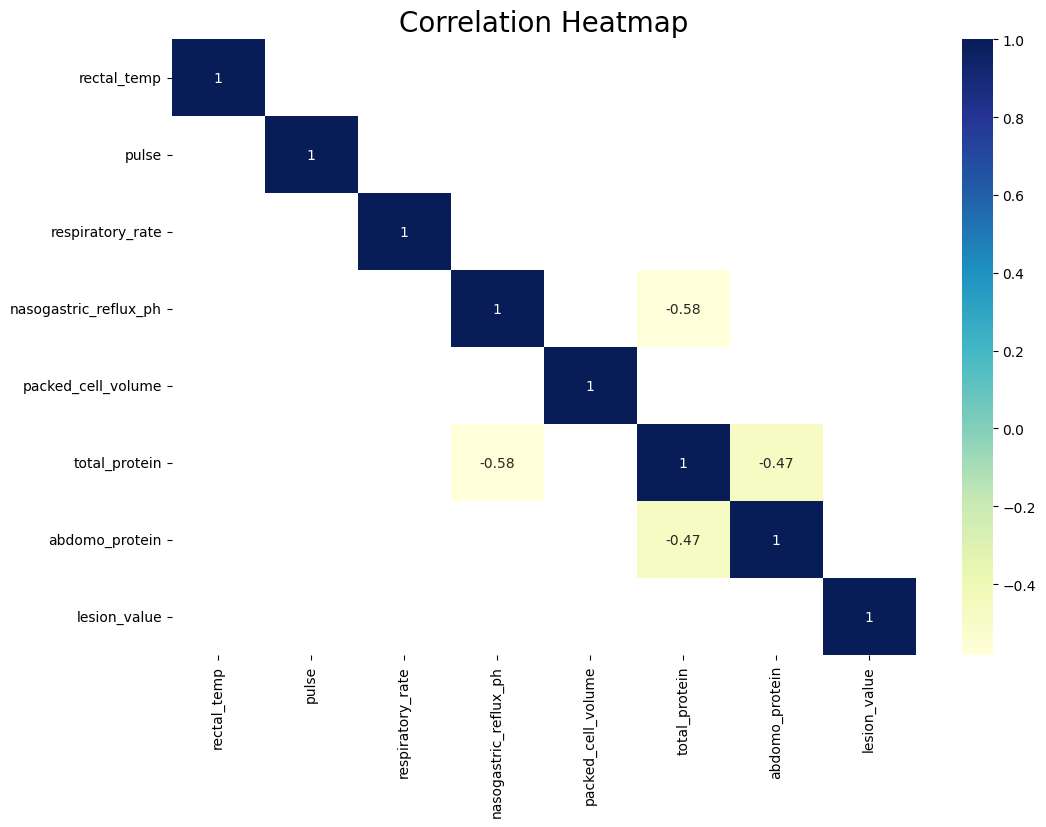

In [75]:
threshold = 0.45
threshold_corr_matrx = corr_matrx[np.abs(corr_matrx) > threshold]

plt.figure(figsize = [12,8]);
sb.heatmap(threshold_corr_matrx, cmap="YlGnBu", annot=True);
plt.title('Correlation Heatmap', size = 20);

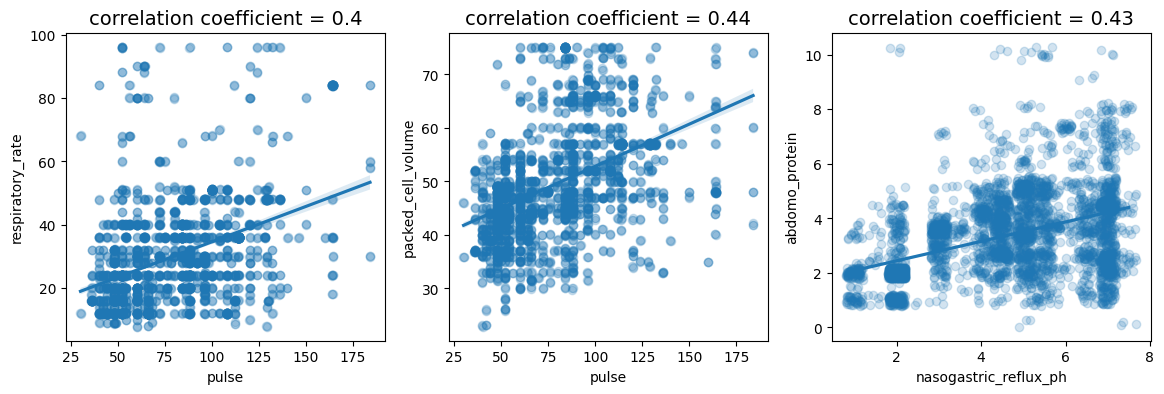

In [76]:
# investigate high correlation between features

# visualize relationship between positive corr value :-
plt.figure(figsize=[14,4]);

# pulse vs respiratory_rate :
plt.subplot(1,3,1);
sb.regplot(data = df_train, x = 'pulse', y = 'respiratory_rate',scatter_kws={'alpha':0.2}, x_jitter=0.2, y_jitter=0.2);
plt.title('correlation coefficient = 0.4',size = 14);

# pulse vs packed_cell_volume :
plt.subplot(1,3,2);
sb.regplot(data = df_train, x = 'pulse', y = 'packed_cell_volume',scatter_kws={'alpha':0.2}, x_jitter=0.2, y_jitter=0.2);
plt.title('correlation coefficient = 0.44',size = 14);

# nasogastric_reflux_ph vs abdomo_protein :
plt.subplot(1,3,3);
sb.regplot(data = df_train, x = 'nasogastric_reflux_ph', y = 'abdomo_protein',scatter_kws={'alpha':0.2}, x_jitter=0.2, y_jitter=0.2);
plt.title('correlation coefficient = 0.43',size = 14);

In [77]:
# comparing test and train distribution
train_lable = df_train.copy()
train_lable['section'] = 'train'

test_lable = df_test.copy()
test_lable['section'] = 'test'
# merging train and test dataframe
merged_data = pd.concat([train_lable.drop(columns = ['outcome']), test_lable], axis=0)
merged_data.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,lesion_type,lesion_value,section
0,yes,adult,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,depressed,absent,slight,slight,less_1_liter,6.5,decreased,distend_small,57.0,8.5,serosanguious,3.4,yes,no,lesion_1,2209,train
1,yes,adult,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,mild_pain,absent,moderate,none,more_1_liter,2.0,absent,distend_small,33.0,64.0,serosanguious,2.0,yes,no,lesion_1,2208,train
2,yes,adult,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,extreme_pain,hypomotile,moderate,slight,none,3.5,NaN,distend_large,37.0,6.4,serosanguious,3.4,yes,no,lesion_1,5124,train
3,yes,adult,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,mild_pain,hypomotile,moderate,slight,more_1_liter,2.0,decreased,distend_small,53.0,7.0,cloudy,3.9,yes,yes,lesion_1,2208,train
4,no,adult,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,alert,hypomotile,none,slight,less_1_liter,7.0,normal,normal,47.0,7.3,cloudy,2.6,no,yes,lesion_1,0,train


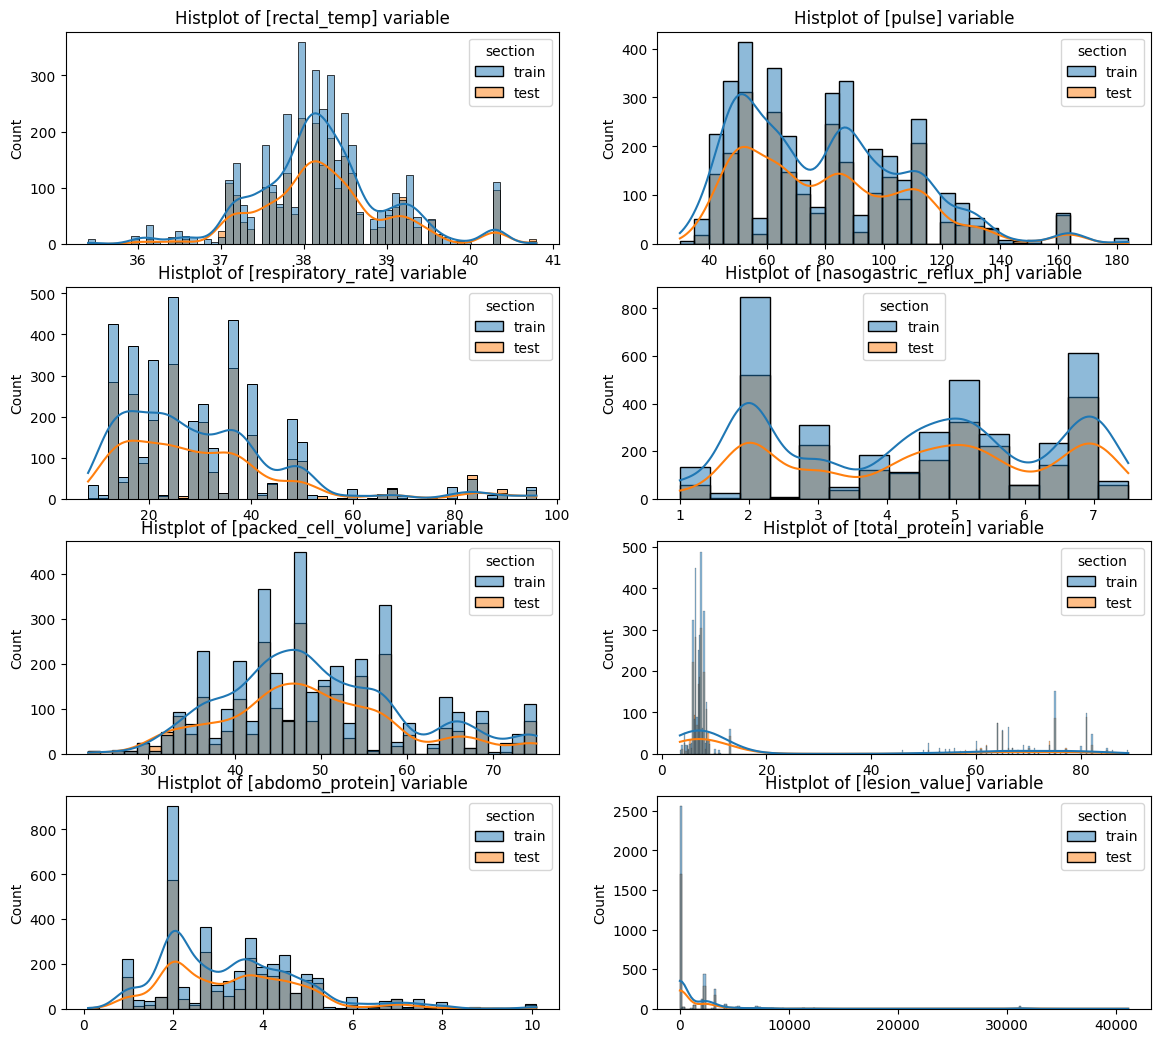

In [78]:
# Visualizing features :
j = 1
plt.figure(figsize=(14,16));
for i in merged_data.columns:
    if merged_data[i].dtype != 'object':    
        plt.subplot(5,2,j);
        sb.histplot(data = merged_data, x = merged_data[i],kde = True, hue = merged_data['section']);
        plt.title('Histplot of ['+ i +'] variable', size = 12);
        plt.xlabel(" ")
        j+=1

In [79]:
# getting unique values of each non-numeric column :-
for i in df_train_cat.columns:
    print('\n',i,'unique values are :',df_train_cat[i].unique())


 surgery unique values are : ['yes' 'no']

 age unique values are : ['adult' 'young']

 temp_of_extremities unique values are : ['cool' 'cold' 'normal' 'warm' nan]

 peripheral_pulse unique values are : ['reduced' 'normal' nan 'absent' 'increased']

 mucous_membrane unique values are : ['dark_cyanotic' 'pale_cyanotic' 'pale_pink' 'normal_pink' 'bright_pink'
 'bright_red' nan]

 capillary_refill_time unique values are : ['more_3_sec' 'less_3_sec' nan '3']

 pain unique values are : ['depressed' 'mild_pain' 'extreme_pain' 'alert' 'severe_pain' nan 'slight']

 peristalsis unique values are : ['absent' 'hypomotile' 'normal' 'hypermotile' nan 'distend_small']

 abdominal_distention unique values are : ['slight' 'moderate' 'none' 'severe' nan]

 nasogastric_tube unique values are : ['slight' 'none' 'significant' nan]

 nasogastric_reflux unique values are : ['less_1_liter' 'more_1_liter' 'none' nan 'slight']

 rectal_exam_feces unique values are : ['decreased' 'absent' nan 'normal' 'increas

In [80]:
# some features have values = none & None 
# first we want to make a unification of values for such values
for i in df_train_cat.columns:
    df_train_cat[i] = df_train_cat[i].replace('none',None)
    
for i in df_train.columns:
    df_train[i] = df_train[i].replace('none',None)

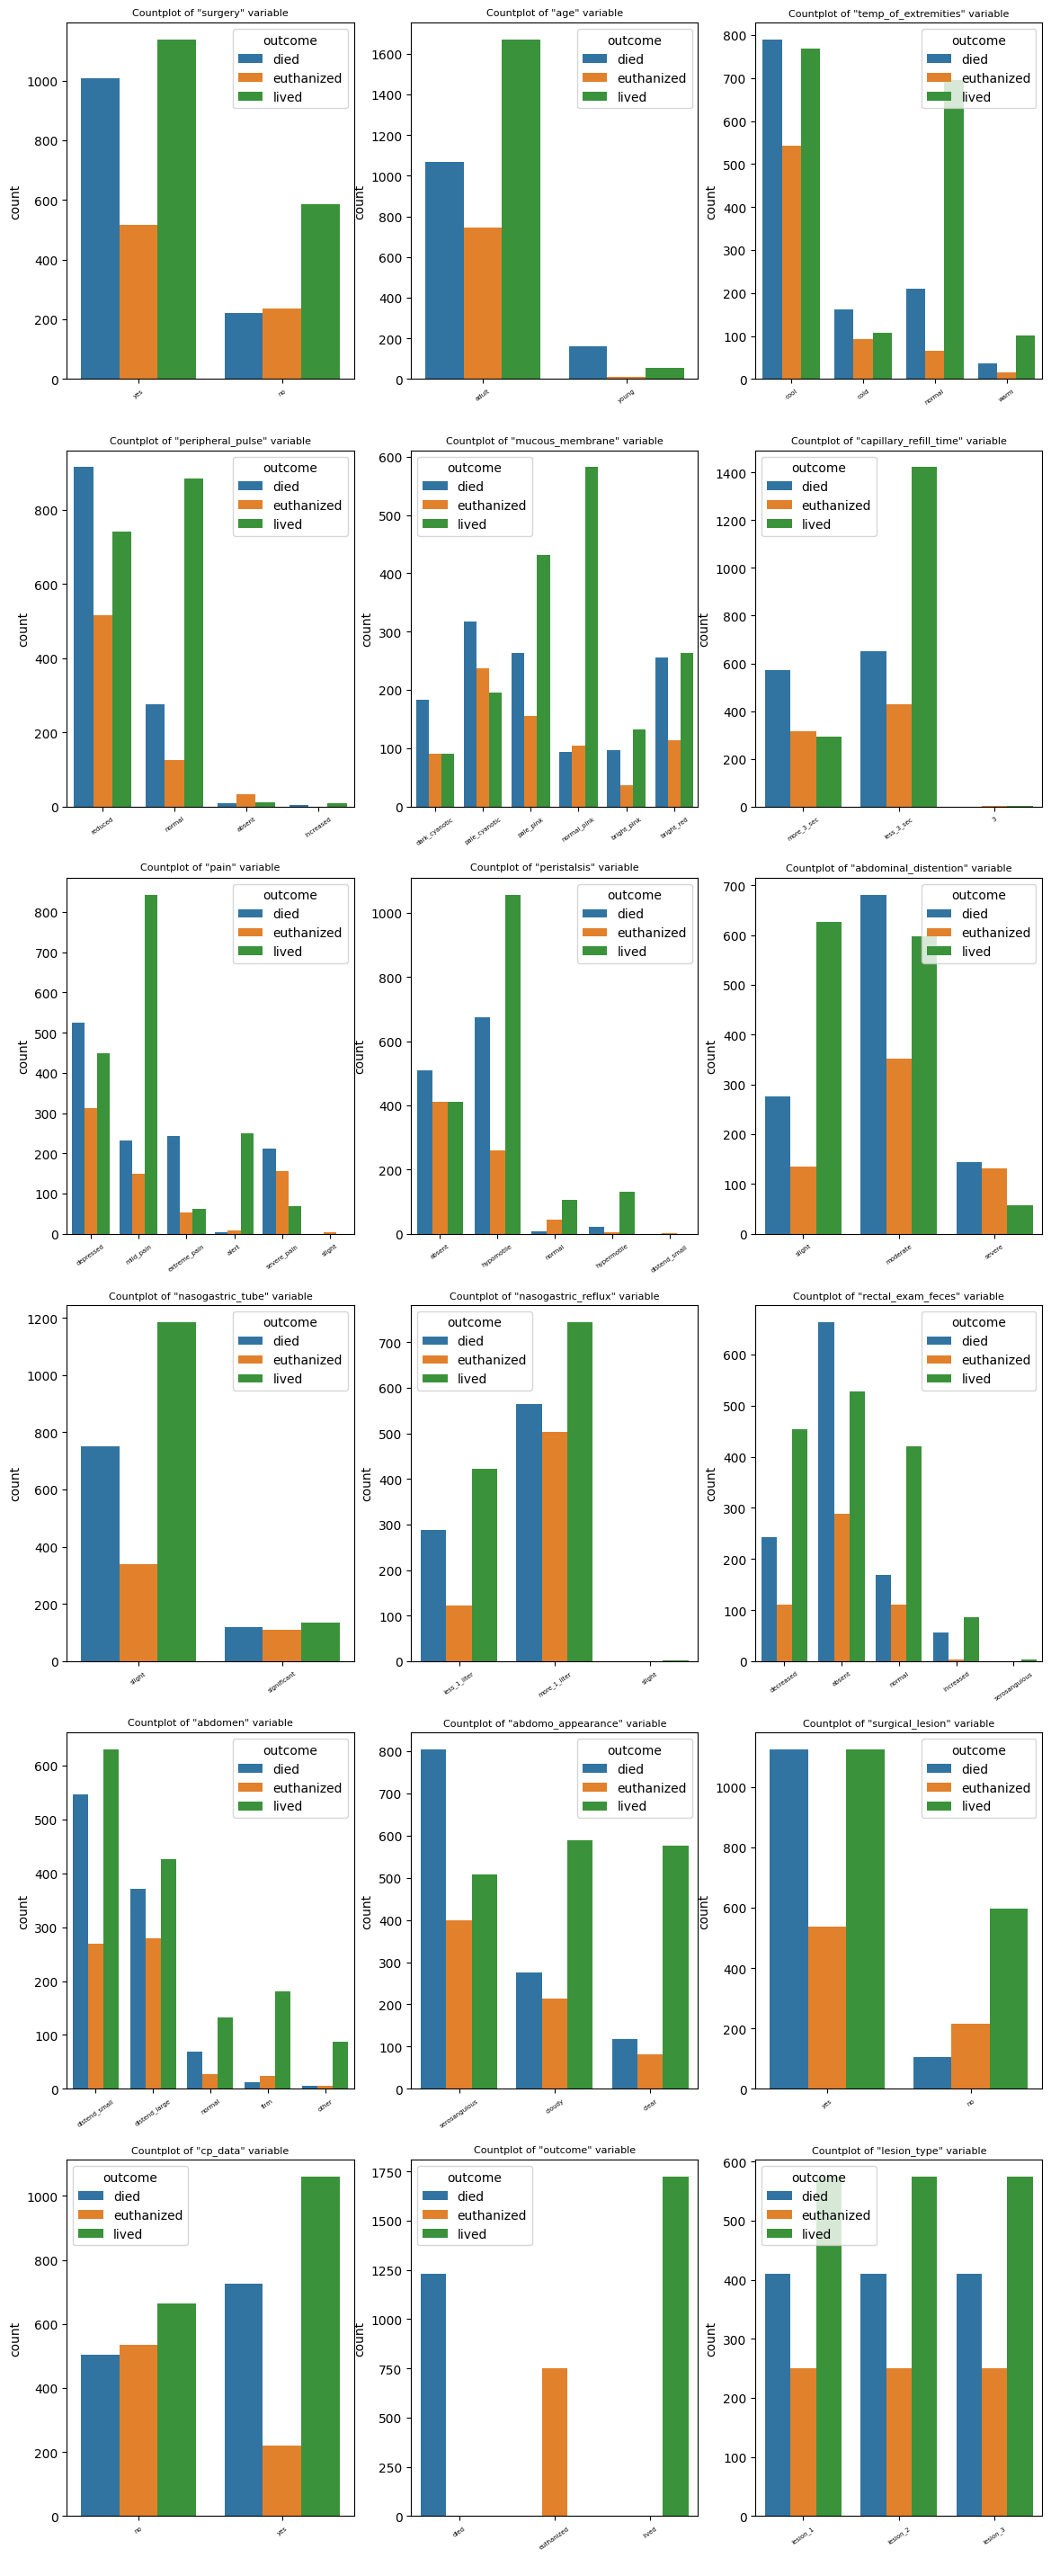

In [81]:
plt.figure(figsize=(14,36));
j = 1
for i in df_train_cat.columns:   
    plt.subplot(6,3,j);
    ax = sb.countplot(data = df_train_cat, x = df_train_cat[i], hue = 'outcome');
    plt.title('Countplot of "'+ i +'" variable',size=8);
    plt.xticks(rotation = 35,size=5)
    plt.xlabel(" ")
    j+=1

In [82]:
df_train_2 = df_train.apply(LabelEncoder().fit_transform)
df_train_2[df_train_numerical.columns] = StandardScaler().fit_transform(df_train_2[df_train_numerical.columns])
df_train_2.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,outcome,lesion_type,lesion_value
0,1,0,-0.128748,1.769018,-0.248678,1,3,2,2,1,0,2,1,0,1.111422,1,1,0.764904,0.204998,2,0.118159,1,0,0,0,0.692760
1,1,0,-0.916545,0.425907,-1.384281,1,2,4,2,3,0,0,2,1,-1.127943,0,1,-1.681126,1.397335,2,-0.928774,1,0,1,0,0.611183
2,1,0,0.133851,1.349296,0.129856,1,3,5,1,2,3,0,1,3,-0.630306,5,0,-1.289761,-0.838296,2,0.118159,1,0,2,0,2.487468
3,1,0,-1.441743,-0.245648,0.256034,0,3,5,2,3,3,0,1,1,-1.127943,1,1,0.373539,-0.540212,1,0.440292,1,1,2,0,0.611183
4,0,0,-0.260047,-0.917203,1.139281,2,2,3,1,0,3,3,1,0,1.484649,3,3,-0.213508,-0.391170,1,-0.445574,0,1,2,0,-0.530904


In [83]:
df_test_2 = df_test.apply(LabelEncoder().fit_transform)
df_test_2[df_test_numerical.columns] = StandardScaler().fit_transform(df_test_2[df_test_numerical.columns])
df_test_2.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,lesion_type,lesion_value
0,0,0,0.534138,-1.570747,-0.738430,2,2,3,1,3,2,3,0,2,1.400718,3,1,-0.678592,-0.227398,0,-0.831483,0,0,0,-0.512803
1,1,0,-0.034321,1.165608,1.053636,1,3,0,2,1,2,0,2,2,-0.759199,1,1,-0.476145,-1.096222,2,-0.494307,0,1,0,0.566430
2,1,0,-0.744895,-0.492789,-1.335785,1,2,1,1,3,2,3,2,2,-0.986559,3,1,-1.792053,-1.096222,1,-1.084365,1,1,0,0.296622
3,0,0,-1.597584,0.419329,-0.738430,1,3,4,1,1,0,2,2,1,-1.213918,0,0,2.256896,2.031542,3,-1.505835,1,0,0,-0.153059
4,1,0,0.107793,-1.073228,-1.335785,4,2,0,1,3,0,3,2,2,-0.986559,1,1,-1.184711,-0.632849,1,-0.494307,1,1,0,0.566430


In [84]:
df_train_2.shape

(3705, 26)

In [85]:
# split labels and target :
x = df_train_2.drop(columns=['outcome'])
y = df_train_2['outcome']

x = np.array(x)
y = np.array(y)

# Convert numpy arrays to torch tensors
x = torch.from_numpy(x).type(torch.float) 
y = torch.from_numpy(y).type(torch.float) 

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42) 

In [86]:
x_train.shape

torch.Size([2964, 25])

In [87]:
y_train.shape

torch.Size([2964])

In [88]:
# Create data loader
train_loader = torch.utils.data.DataLoader(list(zip(x_train,y_train)), batch_size=30)
test_loader = torch.utils.data.DataLoader(list(zip(x_test,y_test)), batch_size=15)

In [89]:
# defining the fully connected neural network
model = nn.Sequential(nn.Linear(25,256),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      nn.Linear(256,512),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      nn.Linear(512,128),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      nn.Linear(128,64),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      nn.Linear(64,10),
                      nn.ReLU(),
                      nn.Dropout(0.3),
                      nn.Linear(10,3),
                      nn.Softmax(dim = 1))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),lr=0.01)

In [90]:
n_epochs = 1000
train_losses = []
test_losses = []
acc = []
steps = 20
model.train()

Sequential(
  (0): Linear(in_features=25, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.3, inplace=False)
  (3): Linear(in_features=256, out_features=512, bias=True)
  (4): ReLU()
  (5): Dropout(p=0.3, inplace=False)
  (6): Linear(in_features=512, out_features=128, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.3, inplace=False)
  (9): Linear(in_features=128, out_features=64, bias=True)
  (10): ReLU()
  (11): Dropout(p=0.3, inplace=False)
  (12): Linear(in_features=64, out_features=10, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.3, inplace=False)
  (15): Linear(in_features=10, out_features=3, bias=True)
  (16): Softmax(dim=1)
)

In [91]:
for epoch in range(n_epochs):
    
    train_loss = 0
    
    for data, target in train_loader:
        
        optimizer.zero_grad()
        output = model(data)
        
        target = target.type(torch.LongTensor)
        
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    # mean loss per record :-
    train_loss = train_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    
    # we have to set a condition to stop training if loss stop decreaseing :--
    if epoch > 1:
        if round(train_losses[-1],5) == round(train_losses[-2],5) and round(train_losses[-2],5) == round(train_losses[-3],5):
            print('loss stop decreasing .... stop training at epoch',epoch)
            break
    #validation:
    model.eval()
    
    correct = 0
    test_loss = 0
    
    for data, target in test_loader:
        
        logits = model(data)
        target = target.type(torch.LongTensor)
        loss = criterion(logits, target)
        
        test_loss += loss.item()
        correct += torch.sum(target == torch.max(logits,1).indices)
    
        
    test_loss = test_loss / len(test_loader.dataset)
    test_losses.append(test_loss)    
    acc.append(correct)
    if epoch % steps == 0:
        print('training Loss =',"{:.3f}".format(train_loss),
              '... testing Loss =',"{:.3f}".format(test_loss),
              '... accuracy =',"{:.3f}".format(float(correct/x_test.shape[0])*100),'%')
   

training Loss = 0.037 ... testing Loss = 0.074 ... accuracy = 33.873 %
training Loss = 0.034 ... testing Loss = 0.068 ... accuracy = 45.614 %
training Loss = 0.032 ... testing Loss = 0.065 ... accuracy = 57.355 %
training Loss = 0.032 ... testing Loss = 0.064 ... accuracy = 59.514 %
training Loss = 0.031 ... testing Loss = 0.063 ... accuracy = 62.078 %
training Loss = 0.030 ... testing Loss = 0.061 ... accuracy = 64.238 %
training Loss = 0.027 ... testing Loss = 0.056 ... accuracy = 72.470 %
training Loss = 0.025 ... testing Loss = 0.054 ... accuracy = 75.034 %
training Loss = 0.024 ... testing Loss = 0.052 ... accuracy = 78.543 %
training Loss = 0.024 ... testing Loss = 0.050 ... accuracy = 81.511 %
training Loss = 0.024 ... testing Loss = 0.050 ... accuracy = 81.781 %
training Loss = 0.023 ... testing Loss = 0.049 ... accuracy = 81.781 %
loss stop decreasing .... stop training at epoch 221


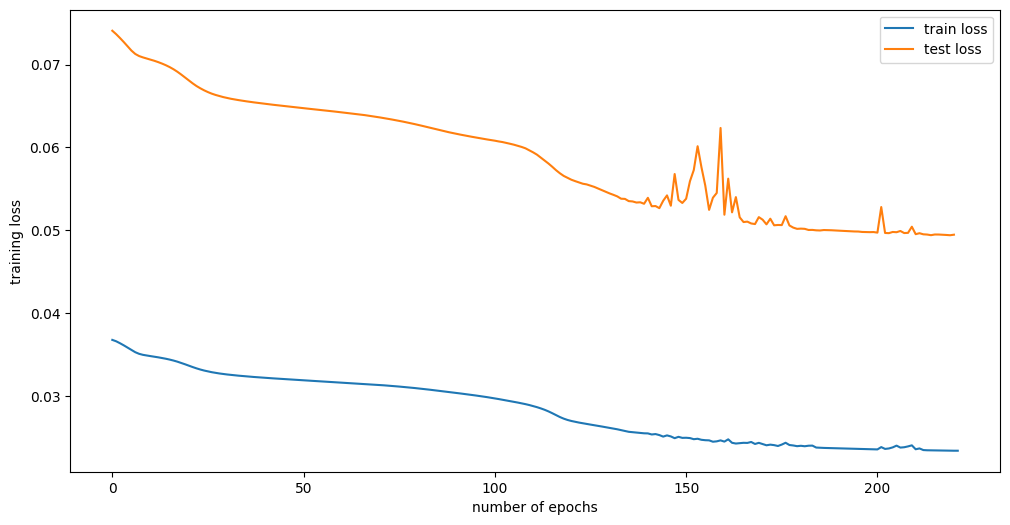

In [92]:
plt.figure(figsize=[12,6])
plt.plot(train_losses);
plt.plot(test_losses);
plt.legend(['train loss','test loss']);
plt.xlabel('number of epochs');
plt.ylabel('training loss');

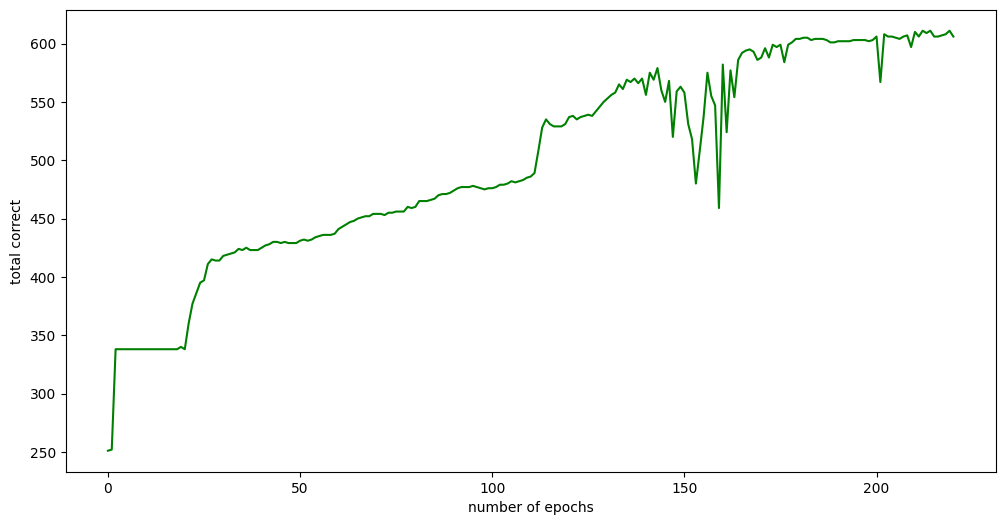

In [93]:
plt.figure(figsize=[12,6])
plt.plot(acc,color='g');
plt.xlabel('number of epochs');
plt.ylabel('total correct');

In [94]:
df_test_2.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,lesion_type,lesion_value
0,0,0,0.534138,-1.570747,-0.738430,2,2,3,1,3,2,3,0,2,1.400718,3,1,-0.678592,-0.227398,0,-0.831483,0,0,0,-0.512803
1,1,0,-0.034321,1.165608,1.053636,1,3,0,2,1,2,0,2,2,-0.759199,1,1,-0.476145,-1.096222,2,-0.494307,0,1,0,0.566430
2,1,0,-0.744895,-0.492789,-1.335785,1,2,1,1,3,2,3,2,2,-0.986559,3,1,-1.792053,-1.096222,1,-1.084365,1,1,0,0.296622
3,0,0,-1.597584,0.419329,-0.738430,1,3,4,1,1,0,2,2,1,-1.213918,0,0,2.256896,2.031542,3,-1.505835,1,0,0,-0.153059
4,1,0,0.107793,-1.073228,-1.335785,4,2,0,1,3,0,3,2,2,-0.986559,1,1,-1.184711,-0.632849,1,-0.494307,1,1,0,0.566430


In [95]:
# convert dataframe to numpy array :
inputs = np.array(df_test_2)
# Convert numpy arrays to torch tensors
inputs = torch.from_numpy(inputs).type(torch.float) 

In [96]:
# passing inputs through model
outputs = model(inputs)

In [97]:
# getting the higher predicted lable
labels = torch.max(outputs,1).indices

In [98]:
pd.DataFrame(np.array(labels)).to_csv('predictions',index=False)

In [99]:
preds = pd.read_csv("predictions")
preds.head()

,0
0,2
1,0
2,2
3,1
4,2


In [100]:
pd.concat([df_test_2,preds], axis=1).head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,cp_data,lesion_type,lesion_value,0
0,0,0,0.534138,-1.570747,-0.738430,2,2,3,1,3,2,3,0,2,1.400718,3,1,-0.678592,-0.227398,0,-0.831483,0,0,0,-0.512803,2
1,1,0,-0.034321,1.165608,1.053636,1,3,0,2,1,2,0,2,2,-0.759199,1,1,-0.476145,-1.096222,2,-0.494307,0,1,0,0.566430,0
2,1,0,-0.744895,-0.492789,-1.335785,1,2,1,1,3,2,3,2,2,-0.986559,3,1,-1.792053,-1.096222,1,-1.084365,1,1,0,0.296622,2
3,0,0,-1.597584,0.419329,-0.738430,1,3,4,1,1,0,2,2,1,-1.213918,0,0,2.256896,2.031542,3,-1.505835,1,0,0,-0.153059,1
4,1,0,0.107793,-1.073228,-1.335785,4,2,0,1,3,0,3,2,2,-0.986559,1,1,-1.184711,-0.632849,1,-0.494307,1,1,0,0.566430,2
